In [ ]:
from google.colab import drive
drive.mount('/content/drive')

🌾 Resultados del cultivo de arroz:
Plantas listas para cosecha: 9952
Plantas aún no listas: 4337 (faltan aprox. 20 días)
Plantas enfermas: 9917


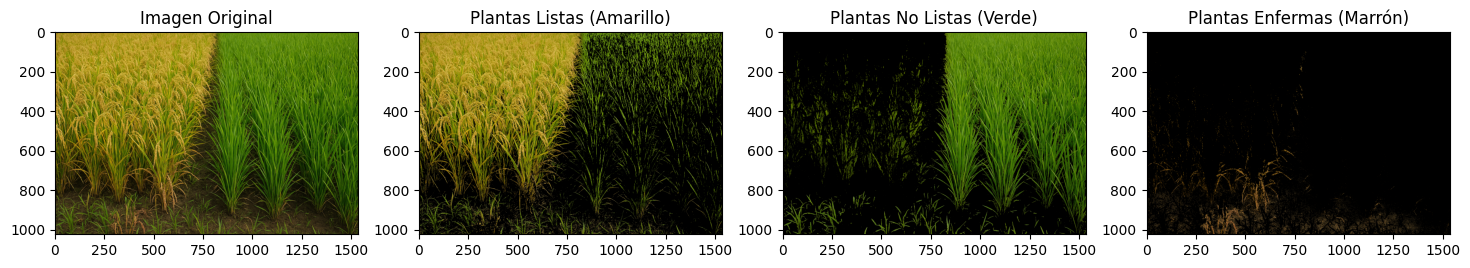

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen
img = cv2.imread("/cUltivo de arroz IA.png")  # Cambia al nombre de tu archivo
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convertir a espacio de color HSV (mejor para distinguir colores)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Rango para plantas listas (amarillo/dorado)
lower_yellow = np.array([20, 80, 80])
upper_yellow = np.array([40, 255, 255])
mask_ready = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Rango para plantas verdes (no listas)
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])
mask_not_ready = cv2.inRange(hsv, lower_green, upper_green)

# Rango para plantas enfermas (marrón/oscuro)
lower_brown = np.array([10, 100, 20])
upper_brown = np.array([20, 255, 200])
mask_sick = cv2.inRange(hsv, lower_brown, upper_brown)

# Contar áreas detectadas
def contar(mask):
    contornos, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return len(contornos)

n_ready = contar(mask_ready)
n_not_ready = contar(mask_not_ready)
n_sick = contar(mask_sick)

# Estimación de días faltantes para las verdes
# (este valor es ejemplo, normalmente se estima con índices de madurez y días de cultivo)
dias_faltantes = 20  # ejemplo: promedio entre 15–25 días

# Mostrar resultados
print("🌾 Resultados del cultivo de arroz:")
print(f"Plantas listas para cosecha: {n_ready}")
print(f"Plantas aún no listas: {n_not_ready} (faltan aprox. {dias_faltantes} días)")
print(f"Plantas enfermas: {n_sick}")

# Crear imágenes para mostrar solo las áreas de interés
img_ready = img_rgb.copy()
img_not_ready = img_rgb.copy()
img_sick = img_rgb.copy()


# Aplicar color a las máscaras en las nuevas imágenes
img_ready[mask_ready == 0] = [0, 0, 0] # Poner en negro las áreas que no son amarillas
img_not_ready[mask_not_ready == 0] = [0, 0, 0] # Poner en negro las áreas que no son verdes
img_sick[mask_sick == 0] = [0, 0, 0] # Poner en negro las áreas que no son marrones


# Mostrar imágenes separadas
plt.figure(figsize=(18,6))
plt.subplot(1,4,1); plt.imshow(img_rgb); plt.title("Imagen Original")
plt.subplot(1,4,2); plt.imshow(img_ready); plt.title("Plantas Listas (Amarillo)")
plt.subplot(1,4,3); plt.imshow(img_not_ready); plt.title("Plantas No Listas (Verde)")
plt.subplot(1,4,4); plt.imshow(img_sick); plt.title("Plantas Enfermas (Marrón)")

plt.show()

In [ ]:
# Mostrar las matrices de las máscaras
print("Matriz de Plantas Listas (Amarillo):")
display(mask_ready)

print("\nMatriz de Plantas No Listas (Verde):")
display(mask_not_ready)

print("\nMatriz de Plantas Enfermas (Marrón):")
display(mask_sick)

Matriz de Plantas Listas (Amarillo):


array([[255, 255, 255, ..., 255,   0,   0],
       [255, 255, 255, ..., 255,   0,   0],
       [255, 255, 255, ..., 255, 255,   0],
       ...,
       [255,   0, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0]], dtype=uint8)


Matriz de Plantas No Listas (Verde):


array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)


Matriz de Plantas Enfermas (Marrón):


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)